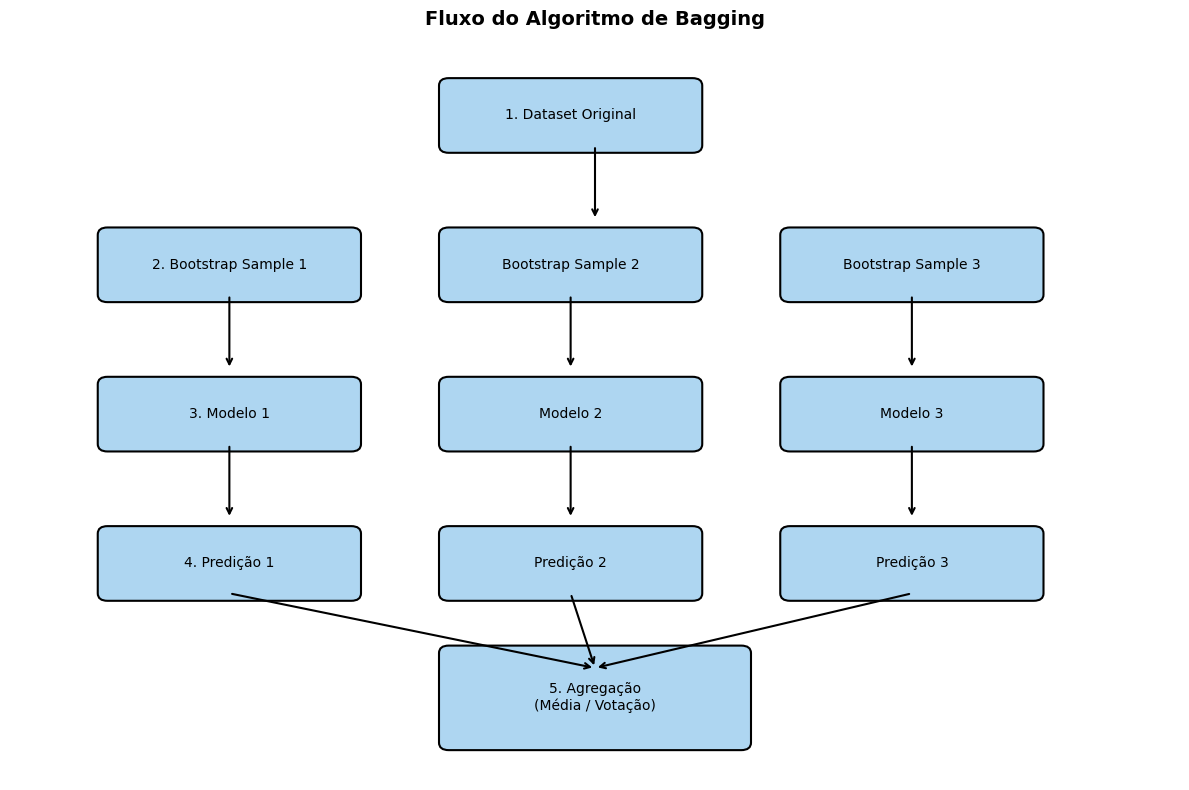

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, Arrow

def draw_box(text, xy, ax, width=2.5, height=0.8, fontsize=10):
    box = FancyBboxPatch((xy[0], xy[1]), width, height,
                         boxstyle="round,pad=0.1", edgecolor="black", facecolor="#AED6F1", linewidth=1.5)
    ax.add_patch(box)
    ax.text(xy[0] + width / 2, xy[1] + height / 2, text, ha="center", va="center", fontsize=fontsize)

def draw_arrow(start, end, ax):
    ax.annotate('', xy=end, xytext=start,
                arrowprops=dict(arrowstyle="->", lw=1.5, color="black"))

# Cria a figura
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, 12)
ax.set_ylim(0, 10)
ax.axis('off')

# Etapas
draw_box("1. Dataset Original", (4.5, 8.5), ax)
draw_arrow((6, 8.5), (6, 7.5), ax)

draw_box("2. Bootstrap Sample 1", (1, 6.5), ax)
draw_box("Bootstrap Sample 2", (4.5, 6.5), ax)
draw_box("Bootstrap Sample 3", (8, 6.5), ax)

draw_arrow((2.25, 6.5), (2.25, 5.5), ax)
draw_arrow((5.75, 6.5), (5.75, 5.5), ax)
draw_arrow((9.25, 6.5), (9.25, 5.5), ax)

draw_box("3. Modelo 1", (1, 4.5), ax)
draw_box("Modelo 2", (4.5, 4.5), ax)
draw_box("Modelo 3", (8, 4.5), ax)

draw_arrow((2.25, 4.5), (2.25, 3.5), ax)
draw_arrow((5.75, 4.5), (5.75, 3.5), ax)
draw_arrow((9.25, 4.5), (9.25, 3.5), ax)

draw_box("4. Predição 1", (1, 2.5), ax)
draw_box("Predição 2", (4.5, 2.5), ax)
draw_box("Predição 3", (8, 2.5), ax)

# Flechas para agregação
draw_arrow((2.25, 2.5), (6, 1.5), ax)
draw_arrow((5.75, 2.5), (6, 1.5), ax)
draw_arrow((9.25, 2.5), (6, 1.5), ax)

draw_box("5. Agregação\n(Média / Votação)", (4.5, 0.5), ax, width=3, height=1.2)

plt.title("Fluxo do Algoritmo de Bagging", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


### 🧠 Explicação do Bagging com mais detalhes

**Bagging** (*Bootstrap Aggregating*) é uma técnica de *ensemble learning* (aprendizado em conjunto) que tem como objetivo principal **reduzir a variância de modelos preditivos**, como árvores de decisão, por meio de **reamostragem com reposição e agregação de resultados**.

---

####  Etapa 1: Reamostragem (Bootstrap)

Em vez de treinar um único modelo sobre todo o conjunto de dados original, o Bagging cria **várias amostras aleatórias com reposição**. Ou seja, cada amostra pode conter registros repetidos e deixar outros de fora, criando diferentes versões do dataset original.

---

####  Etapa 2: Treinamento em paralelo

Cada amostra é usada para treinar um **modelo fraco** (por exemplo, uma árvore de decisão de baixa profundidade). Esses modelos são treinados **de forma independente e paralela**, aprendendo padrões distintos dos dados.

---

####  Etapa 3: Agregação das previsões

As previsões dos modelos individuais são **combinadas para formar a saída final**:

- Para **classificação**, usa-se a **votação por maioria** (*hard voting*).
- Para **regressão**, calcula-se a **média das previsões** (*soft voting*).

Essa combinação ajuda a **compensar erros individuais**, tornando o modelo final **mais robusto e generalizável**, com menor risco de overfitting.

---

####  Analogia intuitiva

Imagine que você quer tomar uma decisão importante, como investir em ações. Em vez de confiar na opinião de apenas uma pessoa, você consulta vários especialistas com diferentes experiências. Ao combinar essas opiniões, você toma uma decisão mais equilibrada. O Bagging funciona da mesma forma: **combina vários modelos simples para gerar uma previsão mais confiável**.

---


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from collections import Counter
import random

# 1. Carregar dados
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

O BaggingClassifier é uma classe do scikit-learn que implementa o algoritmo de Bagging (Bootstrap Aggregating) para tarefas de classificação.

Ele treina vários modelos (chamados de estimadores base) em subconjuntos aleatórios do conjunto de treinamento e depois combina as previsões deles para produzir uma predição final mais estável e robusta.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=10,
    bootstrap=True,
    random_state=42
)
bagging_model.fit(X_train, y_train)
print("Acurácia com Bagging (Sklearn):", bagging_model.score(X_test, y_test))

###  Como o processo funciona?

####  Bootstrap
- O `BaggingClassifier` cria `n_estimators` subconjuntos de dados a partir do conjunto de treino, **com reposição**.
- Por padrão, cada subconjunto tem o **mesmo tamanho do dataset original** (`max_samples=1.0`), mas esse valor pode ser ajustado conforme necessário.

####  Treinamento
- Cada subconjunto é usado para treinar um **modelo independente** (geralmente um `DecisionTreeClassifier`).
- Esses modelos são chamados de **estimadores fracos**, pois isoladamente podem ter desempenho limitado, mas juntos formam um modelo forte.

####  Agregação (votação)
- Durante a previsão com `.predict()`, **cada modelo vota** em uma classe.
- A classe com **maior número de votos** é escolhida como a predição final — isso é conhecido como **hard voting**.
- Quando se usa `.predict_proba()`, a **média das probabilidades preditas** pelos modelos é calculada — esse processo é conhecido como **soft voting**.

####  Out-of-Bag Score (opcional)
- Quando `oob_score=True`, o scikit-learn calcula a acurácia média usando **apenas as amostras que não foram usadas** no treinamento de cada estimador.
- É como uma **validação cruzada embutida**, útil para medir o desempenho do modelo **sem precisar de um conjunto de teste separado**.
